In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
matrix = pd.read_csv('./中间数据/matrix.csv')

In [3]:
# matrix = matrix[matrix["date_block_num"]!=40]
matrix

,date_block_num,sales_region_code,item_code,item_cnt_month,first_cate_code,second_cate_code
0,0,101,20003,0.0,301,405
1,0,101,20006,0.0,307,403
2,0,101,20007,3092.0,305,412
3,0,101,20008,308.0,303,401
4,0,101,20009,260.0,306,407
...,...,...,...,...,...,...
123243,45,105,22066,0.0,307,403
123244,45,105,22072,0.0,305,412
123245,45,105,22075,0.0,307,403
123246,45,105,22083,0.0,303,401


In [4]:
second_item_list = matrix.second_cate_code.unique()


In [5]:
second_item_list 

array([405, 403, 412, 401, 407, 408, 404, 409, 410, 402, 406, 411])

In [6]:
# 比如说我要second_cate_code411地区的
for i in [401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412]:
    item_list = matrix[matrix["second_cate_code"]==i].item_code.unique()
    print(len(item_list))

202
16
194
191
44
15
560
442
107
34
7
223


In [7]:
len(item_list)

223

In [8]:
item_list = [22032,22043,20555,20798,21255 ,21472, 21253,21971,21212,20545]

In [9]:
item_list = [20296, 20589,20545, 21587, 20773, 21203,20392,20545, 21846]

In [10]:
error_item_list = pd.read_csv("./中间数据/剔除数据1.csv")


In [11]:
item_list = matrix[matrix["second_cate_code"]==403].item_code.unique()


20687


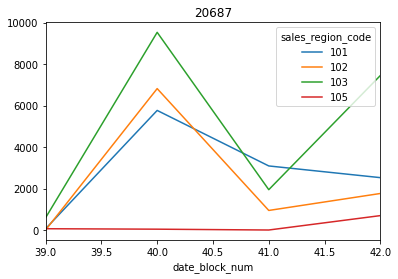

In [16]:
# 分析商品，在各个地区的销售情况
# item_list = error_item_list["item_code"]
item_list = [20687] 
for item in item_list:
    item_df = matrix[matrix["item_code"]==item]
    sales_by_region = item_df.groupby(['sales_region_code',"date_block_num"])['item_cnt_month'].sum().unstack(level=0)
    print(item)

    # 绘制折线图
    fig, ax = plt.subplots()
    sales_by_region.plot(ax=ax)
    ax.set_title(f'{item}')
#     ax.set_xlabel('time')
#     ax.set_ylabel('sale')
#     plt.xlim(39, 42)
    plt.show()
#     plt.savefig(f"./图片/表格分析/{item}.png",dpi=100)


In [40]:
item_list = matrix[matrix["second_cate_code"]==412].item_code.unique()


TypeError: no numeric data to plot

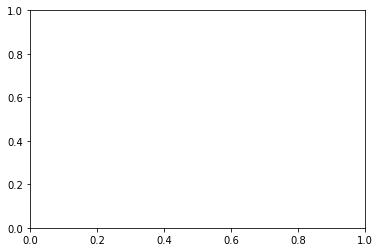

In [41]:
import matplotlib.pyplot as plt

# 创建一个空的 Matplotlib 图形对象和一个坐标轴对象
fig, ax = plt.subplots()


# 循环遍历商品列表
for item in item_list:
    # 按照现有代码中的方式，找出该商品在各个销售区域的销售情况，并将结果保存到一个数据框中
    item_df = matrix[matrix["second_cate_code"]==item]
    sales_by_region = item_df.groupby(['sales_region_code',"date_block_num"])['item_cnt_month'].sum().unstack(level=0)

    # 将每个商品在各个销售区域的销售情况绘制在同一个坐标系中
    sales_by_region.plot(ax=ax)
# 移除当前坐标系中的图例
ax.legend().remove()
# 设置图形标题、坐标轴标签等信息
ax.set_title('Sales by Region')
ax.set_xlabel('Time')
ax.set_ylabel('Sales')

# 显示图形
# plt.show()
# plt.savefig("./图片/促销商品.png",dpi=300)

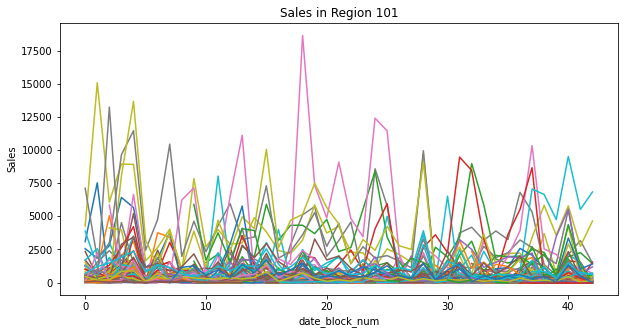

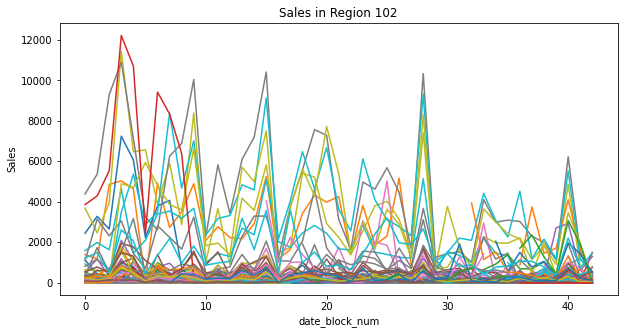

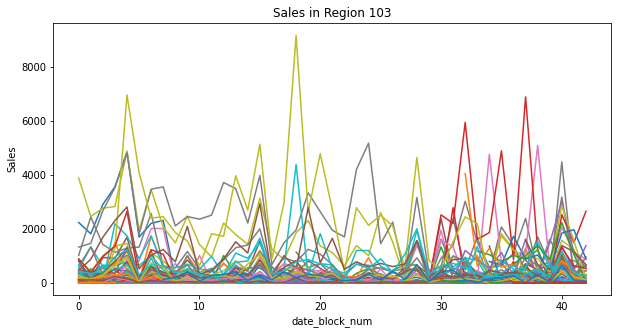

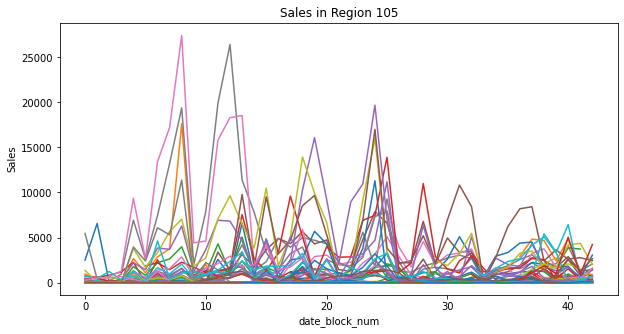

In [65]:
import matplotlib.pyplot as plt
matrix = pd.read_csv('./中间数据/matrix.csv')
matrix = matrix[matrix["date_block_num"]!=43]
matrix = matrix[matrix["date_block_num"]!=44]
matrix = matrix[matrix["date_block_num"]!=45]
matrix =  matrix[matrix["second_cate_code"] == 412]
sales_region_list = [101,102,103,105]

# 循环遍历销售区域列表
for sales_region in sales_region_list:
    # 创建一个新的 Matplotlib 图形对象和坐标轴对象
    fig, ax = plt.subplots(figsize=(10, 5))

    # 按照销售区域分组，找出该销售区域中每个商品的销售情况，并将结果保存到一个数据框中
    region_df = matrix[matrix["sales_region_code"] == sales_region]
    sales_by_item = region_df.groupby(["item_code", "date_block_num"])["item_cnt_month"].sum().unstack(level=0)

    # 在图中绘制该销售区域中所有商品的销售情况
    ax.set_title(f"Sales in Region {sales_region}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Sales")
    sales_by_item.plot(ax=ax, legend=None)

    # 显示图形
    plt.show()


# 合成

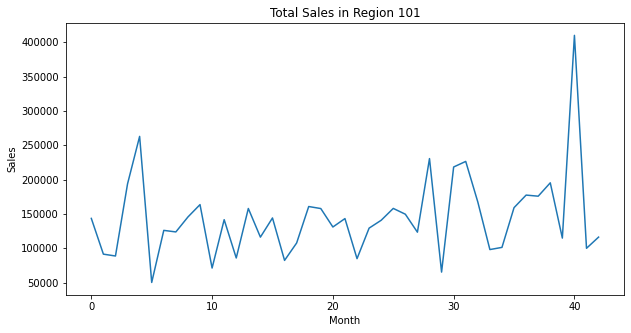

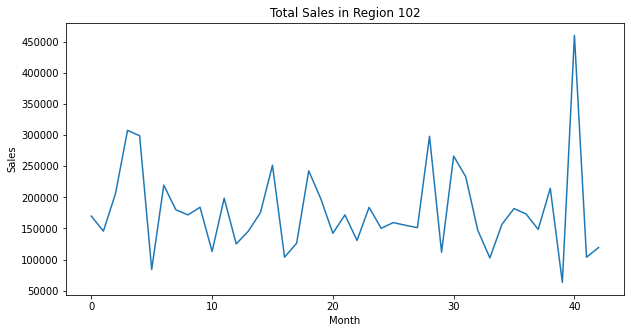

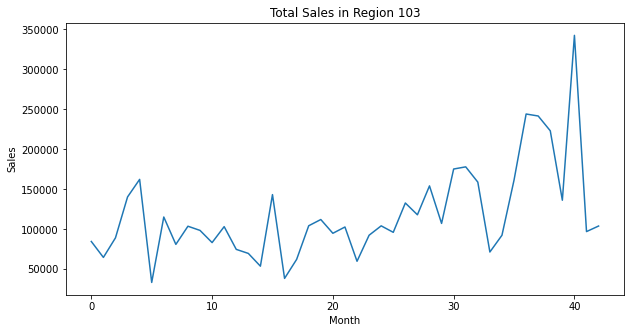

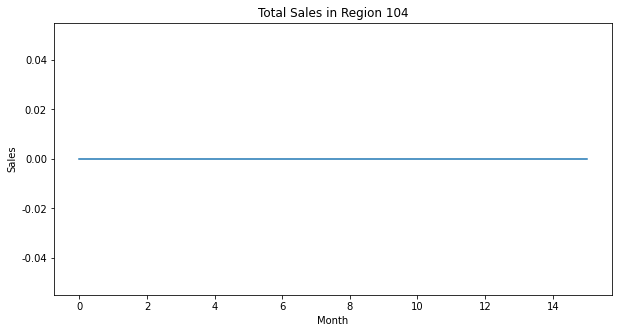

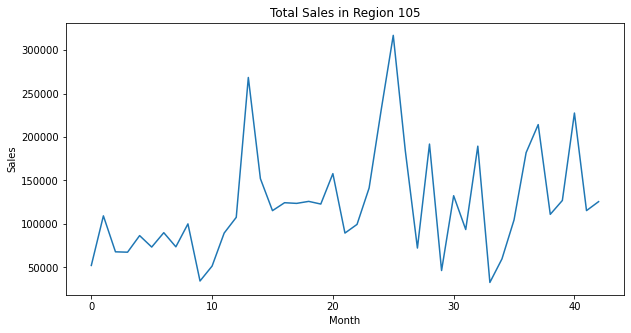

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the sales data from a CSV file
matrix = pd.read_csv('./中间数据/matrix.csv')

# Filter out data for the 40th month and a specific category of products
matrix = matrix[matrix["date_block_num"] != 43]
matrix = matrix[matrix["date_block_num"] != 44]
matrix = matrix[matrix["date_block_num"] != 45]

matrix = matrix[matrix["second_cate_code"] == 407]

# Define the sales regions to analyze
sales_region_list = [101, 102, 103, 104, 105]

# sales_region_list = [105]
# Loop over each sales region in the list
for sales_region in sales_region_list:
    # Create a new figure and axis for the current sales region
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Filter the sales data to only include data for the current sales region
    region_df = matrix[matrix["sales_region_code"] == sales_region]
    
    # Group the sales data by month and sum the sales for all products
    sales_by_month = region_df.groupby("date_block_num")["item_cnt_month"].sum()
    
    # Plot the total sales for the current sales region
    ax.plot(sales_by_month.index, sales_by_month.values)
    
    # Add labels and legend to the plot
    ax.set_title(f"Total Sales in Region {sales_region}")
    ax.set_xlabel("Month")
    ax.set_ylabel("Sales")
    
    # Display the plot for the current sales region
    plt.show()


In [31]:
# sales_by_month

- 高峰  13 25  28 30 32 36 37

# 商品分层

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose


def sales_seasonality_12(df, item_code):
    """
    分类商品为季节性商品
    """
    # 选择对应商品的数据
    item_df = df[df["item_code"] == item_code]

    # 按照月份进行分组，计算销售量的均值
    sales_by_month = item_df.groupby("date_block_num")["item_cnt_month"].mean()

    # 使用STL分解方法，获取季节性分量
    decomposition = seasonal_decompose(sales_by_month, period=12)  # 以12个月为一个周期进行分解
    seasonal = decomposition.seasonal


    # 根据季节性分量的大小，判断商品是否具有季节性
    if seasonal.max() / seasonal.min() > 1.5:
        return True
    else:
        return False

    
def sales_seasonality_6(df, item_code):
    """
    分类商品为季节性商品
    """
    # 选择对应商品的数据
    item_df = df[df["item_code"] == item_code]

    # 按照月份进行分组，计算销售量的均值
    sales_by_month = item_df.groupby("date_block_num")["item_cnt_month"].mean()

    # 使用STL分解方法，获取季节性分量
    decomposition = seasonal_decompose(sales_by_month, period=6)  # 以6个月为一个周期进行分解
    seasonal = decomposition.seasonal


    # 根据季节性分量的大小，判断商品是否具有季节性
    if seasonal.max() / seasonal.min() > 1.5:
        return True
    else:
        return False


In [33]:
matrix = pd.read_csv('./中间数据/matrix.csv')

In [34]:
def item_classify(second_code):
    item_list =  matrix[matrix["second_cate_code"] == second_code]["item_code"].unique()
    item_info = pd.DataFrame(columns=['item_code', 'item_type'])

    # 分析商品，在各个地区的销售情况

    for item in item_list:
        item_df = matrix[matrix["item_code"]==item]

        # 新品：第36个月（date_block_num）后才开始出现的
        if item_df['date_block_num'].min() > 35:
            item_type = "新品"
        else:
            # 常规品：一直都在销售的，销售到了39周，且起码存在了一年以上
            if item_df['date_block_num'].max() >= 38 and len(item_df['date_block_num'].unique()) > 12:
                if len(item_df['date_block_num'].unique()) > 24:
                    # 季节性商品：存在明显的销售淡季和旺季
                    if sales_seasonality_12(item_df,item):
                        item_type = "季节性商品"
                    else:
                        item_type = "常规品"
                else:   
                    if sales_seasonality_6(item_df,item):
                        item_type = "季节性商品"
                    else:
                        item_type = "常规品"
            else:
                if item_df['date_block_num'].max() >= 38:
                        item_type = "常规品"  # 防止一些误判
                else:
                # 流星品：突然出现，销售时间<5个月，然后就没什么销量了
                    if item_df['date_block_num'].max() - item_df['date_block_num'].min() < 5:
                            item_type = "流星品"
                    # 睡眠品：一直销售的挺好，再过了某个月后突然不咋销售了，并非季节性因素
                    else:
                            item_type = "睡眠品"

        item_info = item_info.append({'item_code': item, 'item_type': item_type}, ignore_index=True)

        sales_by_region = item_df.groupby(['sales_region_code',"date_block_num"])['item_cnt_month'].sum().unstack(level=0)
        
#         print(f"{item}: {item_type}")

#         绘制折线图
#         plt.rcParams['font.sans-serif'] = ["SimHei"]
#         fig, ax = plt.subplots()
#         sales_by_region.plot(ax=ax)
#         ax.set_title(f'{item} ({item_type})')
#         ax.set_xlabel('time')
#         ax.set_ylabel('sale')
#         plt.show()
    
    print(item_info.item_type.value_counts())
    return item_info

In [35]:
item_classify(409)

新品     41
常规品    37
流星品    17
睡眠品    12
Name: item_type, dtype: int64


,item_code,item_type
0,20367,睡眠品
1,20411,流星品
2,20529,流星品
3,20669,流星品
4,20681,流星品
...,...,...
102,21968,新品
103,20705,新品
104,20909,新品
105,21334,新品


In [36]:
second_code_list = matrix["second_cate_code"].unique()
item_info_sum = pd.DataFrame(columns=['item_code', 'item_type'])
for i in second_code_list:
    print(i)
    item_info = item_classify(i)
    item_info_sum = pd.concat([item_info_sum,item_info],axis=0)
   

405
常规品    19
睡眠品    12
新品     11
流星品     2
Name: item_type, dtype: int64
403
常规品    66
新品     47
睡眠品    46
流星品    35
Name: item_type, dtype: int64
412
常规品    119
新品      54
睡眠品     33
流星品     17
Name: item_type, dtype: int64
401
常规品    109
睡眠品     45
新品      29
流星品     19
Name: item_type, dtype: int64
407
常规品    296
睡眠品    105
流星品     80
新品      79
Name: item_type, dtype: int64
408
常规品    195
睡眠品    112
新品      74
流星品     61
Name: item_type, dtype: int64
404
新品     65
常规品    59
睡眠品    45
流星品    22
Name: item_type, dtype: int64
409
新品     41
常规品    37
流星品    17
睡眠品    12
Name: item_type, dtype: int64
410
常规品    26
新品      5
流星品     2
睡眠品     1
Name: item_type, dtype: int64
402
常规品    5
睡眠品    4
流星品    4
新品     3
Name: item_type, dtype: int64
406
常规品    13
睡眠品     1
新品      1
Name: item_type, dtype: int64
411
常规品    7
Name: item_type, dtype: int64


In [37]:
item_info_sum.to_csv("./中间数据/商品分层.csv",index=False)

In [38]:
# 定义窗口大小
window_size = 6

# 根据窗口大小和步长切分销售量序列为多个子序列

def split_sequence(sequence, window_size):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + window_size
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# 提取子序列
subsequences = {}
for item_code in matrix['item_code'].unique():
    item_sales = matrix[matrix['item_code']==item_code]['item_cnt_month'].values
    X, y = split_sequence(item_sales, window_size)
    subsequences[item_code] = {'X': X, 'y': y}


In [39]:
# 提取统计特征
def extract_features(X):
    return np.array([np.mean(X), np.var(X), np.max(X), np.min(X)])

# 对每个子序列提取特征
for item_code, subseq in subsequences.items():
    X_features = np.apply_along_axis(extract_features, 1, subseq['X'])
    subsequences[item_code]['X_features'] = X_features


AxisError: axis 1 is out of bounds for array of dimension 1